In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

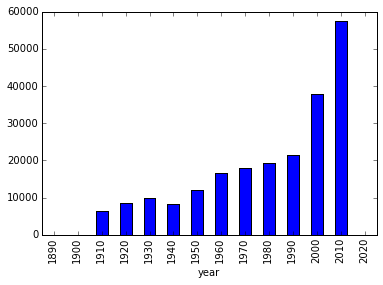

In [8]:
t = titles
t.groupby(t.year//10*10).size().plot(x='year',kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

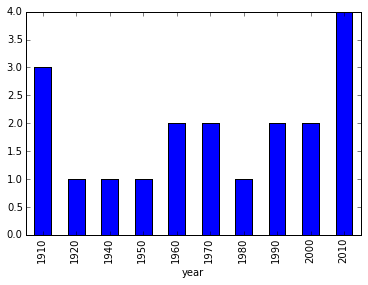

In [12]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year//10*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [14]:
c = cast[(cast.year//10 == 195) & (cast.n == 1)]
c.groupby(['year','type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [20]:
c = cast[(cast.year//10 == 195) & (cast.n < 6)]
c.groupby(['n','type']).size()

n  type   
1  actor      6388
   actress    2813
2  actor      4382
   actress    4404
3  actor      5409
   actress    3022
4  actor      5409
   actress    2744
5  actor      5433
   actress    2448
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [40]:
c = cast[cast.title == 'The Pink Panther']
c.groupby(['year']).character.size()

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [53]:
c = cast[cast.name == 'Frank Oz'].sort('year')
s = c.groupby(['title']).size()
s[s > 1]

title
An American Werewolf in London              2
Muppet Treasure Island                      4
Muppets from Space                          4
Sesame Street Presents: Follow that Bird    3
The Adventures of Elmo in Grouchland        3
The Dark Crystal                            2
The Great Muppet Caper                      6
The Muppet Christmas Carol                  7
The Muppet Movie                            8
The Muppets Take Manhattan                  7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [56]:
c = cast[cast.name == 'Frank Oz']
s = c.groupby(['character']).size()
s[s >= 2].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64